In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time

import paddle
import paddle.fluid as fluid
import paddle.fluid.layers as layers

In [2]:
# 导入数据
data = pd.read_csv('data/data72449/shangzheng.csv')

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


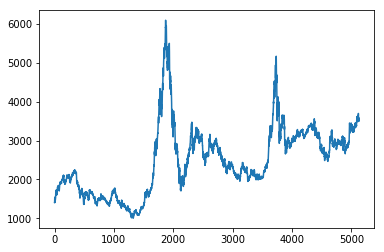

In [5]:
# 查看信息
# data.head()
data.describe()
# data.info()

plt.plot(data['over'])

In [4]:
data = data.loc[:, ['over', 'begin', 'high', 'low']]
data_train = data.iloc[:int(data.shape[0] * 0.8), :]
data_test = data.iloc[int(data.shape[0] * 0.8):, :]
print(data_train.shape, data_test.shape)

(4104, 4) (1026, 4)


In [15]:
# 数据归一化
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

data_train

array([[-0.84455651, -0.85709957, -0.84812269, -0.85603116],
       [-0.8432535 , -0.84159714, -0.83783297, -0.84131221],
       [-0.82189365, -0.84230612, -0.82601114, -0.84054672],
       ...,
       [-0.12553734, -0.12806142, -0.12820231, -0.12391918],
       [-0.1569945 , -0.11842488, -0.12808868, -0.14658263],
       [-0.15617963, -0.1559254 , -0.16045077, -0.15895353]])

In [27]:
output_dim = 1
batch_size = 256
epochs = 50
seq_len = 10
hidden_size = 256

X_train = np.array([data_train[i : i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

train_loader = paddle.io.DataLoader(X_train, batch_size=batch_size)
eval_loader = paddle.io.DataLoader(y_train, batch_size=batch_size)

(4094, 10) (4094,) (1016, 10) (1016,)


AssertionError: dataset should be subclass instance of paddle.io.Dataset

In [26]:
mnist = paddle.nn.Sequential(
    paddle.nn.LSTMCell(seq_len, hidden_size),
    paddle.nn.Linear(hidden_size, 1)
)

model = paddle.Model(mnist)

# 模型训练相关配置，准备损失计算方法，优化器和精度计算方法
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 开始模型训练
model.fit(X_train,
        y_train,
          epochs = epochs,
          batch_size = batch_size)

The loss value printed in the log is the current step, and the metric is the average value of previous step.
Epoch 1/50


ValueError: (InvalidArgument) Tensor holds the wrong type, it holds float, but desires to be double.
  [Hint: Expected valid == true, but received valid:0 != true:1.] (at /paddle/paddle/fluid/framework/tensor_impl.h:33)
  [operator < matmul_v2 > error]